# File I/O and Pandas usage

#### Instructor: Eric Lindsey
---------

In [1]:
#import statements

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 0. Direct Input/output


A very simple way to get input is to use the input() command. This asks the user to type in a value, and the result will be set as a variable.

Note, the input will always be a string - so you may need to convert it if you want to do calculations with it.

A warning - if you run a cell that has input() and then don't enter any input, this will hang your jupyter notebook kernel until you provide the input. You may get a pop-up error like 'cell not executed due to pending input' if you try to run another cell without first providing the requested input.

In [2]:
x=input('enter input:')
print('the input was', x)
print('the type of input was', type(x))

the input was 6
the type of input was <class 'str'>


## 1. File I/O


#### The basics
Basic file I/O is done using the 'with' statement to open a file and close it automatically.

The basic file I/O functions are file.write(str), file.writelines([list of str]), [list of str] = file.readlines(), or simply iterate over the lines using a for loop.

Note that the 'mode' for opening a file is important - it should generally be 'r' (read) or 'w' (write), though in special cases we can also use 'rw' to edit a file in place (not covered here).

In [3]:
with open('simple_file.txt','w') as file:
    file.write('Here is a line\n')
    file.write('Whoops, I forgot a newline here')
    file.write('Will this appear on a new line?\n')
    file.write('Last line.\n')

In [4]:
with open('simple_file.txt','r') as file:
    for line in file:
        print(line)

Here is a line

Whoops, I forgot a newline hereWill this appear on a new line?

Last line.



There are two things to note in the above code. First, we (intentionally) forgot a newline character '\n' in the second line, so there is no break before the third line. This is actually useful - we can use write() statements to write any number of characters at a time, and are not restricted to whole lines.

Second, note how the lines appear double-spaced when we print them out. This is because there is a newline character in the 'line' string, but print() also adds an extra newline by default. To avoid this, we should use print(line.strip()).

Try fixing these issues in the above code. Clearly, this type of file I/O requires a lot of manual management of the details. It's kind of a pain, but can be very useful when we need to control those details.

## 2. Pandas

Pandas is a  useful library for data analysis, with great features that make reading and writing data very easy (it also has other features too!)

In [5]:
import pandas as pd

# create some data - add a bit of randomness so that it changes each time
time=np.linspace(1,10,10)
values=time**2 + np.random.randint(0,3,size=np.size(time))

# create a pandas data frame with the values
# note the special dictionary format: {'name':array} to give the columns names.
df = pd.DataFrame(data={'years as faculty':time, 'number of cats':values})
print(df)

# save the data to a csv file, without the index column
df.to_csv('cats_over_time.csv', index = False)

   years as faculty  number of cats
0               1.0             2.0
1               2.0             4.0
2               3.0            11.0
3               4.0            17.0
4               5.0            27.0
5               6.0            38.0
6               7.0            50.0
7               8.0            64.0
8               9.0            82.0
9              10.0           101.0


In [6]:
# read in the data from a csv file
cats=pd.read_csv('cats_over_time.csv')
print(cats)

   years as faculty  number of cats
0               1.0             2.0
1               2.0             4.0
2               3.0            11.0
3               4.0            17.0
4               5.0            27.0
5               6.0            38.0
6               7.0            50.0
7               8.0            64.0
8               9.0            82.0
9              10.0           101.0


In [8]:
# print just one column
print(cats['years as faculty'])


0     1.0
1     2.0
2     3.0
3     4.0
4     5.0
5     6.0
6     7.0
7     8.0
8     9.0
9    10.0
Name: years as faculty, dtype: float64


Maybe we want our dataframe to look like a nicely formatted table instead of raw text. Here is one option:

In [8]:
# use the 'display' method instead of print to get a nicer table
display(cats)

,years as faculty,number of cats
0,1.0,2.0
1,2.0,4.0
2,3.0,11.0
3,4.0,17.0
4,5.0,27.0
5,6.0,38.0
6,7.0,50.0
7,8.0,64.0
8,9.0,82.0
9,10.0,101.0


## 3. Reading in data with missing values

Sometimes, a data file has missing values. These might be simply blank, or they might be filled with a "missing data" value, like -999 or NaN. Let's explore how to read those files in Pandas.

Note, for these examples to work you'll need to download the data files (missing1.csv, etc) from Canvas first.

#### Ex. 1. Missing data in a CSV file

Open the file 'missing1.csv' with a text editor. For example, right click on it in the file list on the left, and choose 'Open With -> Editor'. You'll notice that some of the Y-values are missing! Whatever are we to do?

Fortunately, the CSV format was designed to handle exactly this case - it's clear which values are missing, and pandas has no trouble reading it in.

Note that pandas fills in the missing data with "NaN" - this stands for "Not a Number" and is a common way to denote missing data. In python, we can specify NaN with 'np.nan'.

          time    values  uncertainty
0     0.021454       NaN     0.837329
1     0.093116       NaN     0.779807
2     0.204718  0.309898     0.109524
3     0.306607  0.450582     0.457958
4     0.388601  0.590540     0.176450
..         ...       ...          ...
96    9.589282  0.612813     0.161543
97    9.697677  0.459697     0.260776
98    9.810221  0.283024     0.308425
99    9.902370  0.142896     0.169303
100  10.004203 -0.004508     0.047728

[101 rows x 3 columns]


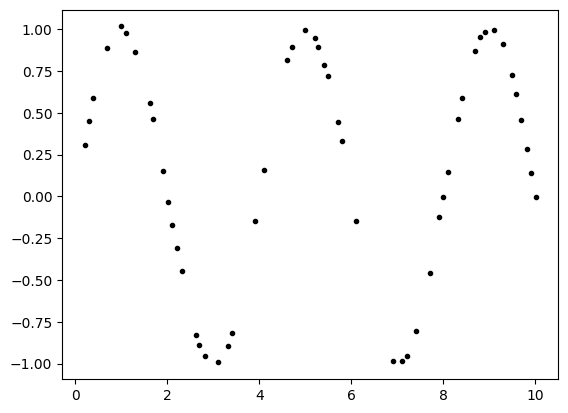

In [ ]:
# read in the data with missing values and make a quick plot.
data1=pd.read_csv('missing1.csv')
print(data1)
plt.plot(data1['time'],data1['values'],'k.') # notice I set the marker to black dots with 'k.'
plt.show()

#### Ex. 2. Missing data in a space-delimited file

Open the file 'missing2.txt' with a text editor. In this file, a single space was used to separate columns.

This is not great - if we try reading it in using the standard way with 'delim_whitespace=True' or sep='\s+', we run into trouble!

/tmp/ipython-input-12-3688857668.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data2=pd.read_csv('missing2.txt',delim_whitespace=True)


          time    values  uncertainty
0     0.021454  0.837329          NaN
1     0.093116  0.779807          NaN
2     0.204718  0.309898     0.109524
3     0.306607  0.450582     0.457958
4     0.388601  0.590540     0.176450
..         ...       ...          ...
96    9.589282  0.612813     0.161543
97    9.697677  0.459697     0.260776
98    9.810221  0.283024     0.308425
99    9.902370  0.142896     0.169303
100  10.004203 -0.004508     0.047728

[101 rows x 3 columns]


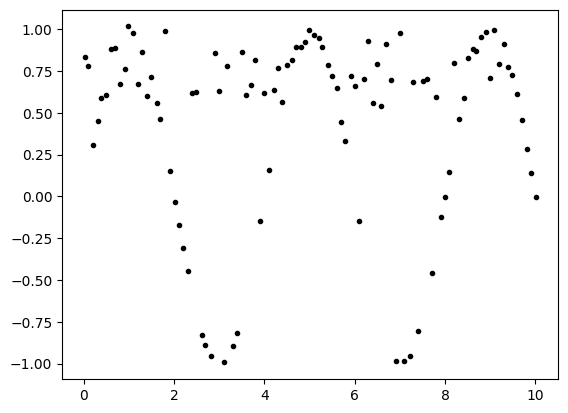

In [ ]:
data2=pd.read_csv('missing2.txt',delim_whitespace=True)
print(data2)
plt.plot(data2['time'],data2['values'],'k.')
plt.show()

These two data files should have the same data, what happened? Compare how they look when we printed them out above. The second version is all mixed up, because column 3 (uncertainty) is being interpreted as column 2 whenever there are missing data.

To fix this, we should specify that we want exactly 1 space as our separator.

*Note, I know this will work becasue I created the file. But in general, it can be very dangerous to try to read in a file like this, because we don't necessarily know if it was written out using 1 space, or 1 tab, or something else... user beware!*

          time    values  uncertainty
0     0.021454       NaN     0.837329
1     0.093116       NaN     0.779807
2     0.204718  0.309898     0.109524
3     0.306607  0.450582     0.457958
4     0.388601  0.590540     0.176450
..         ...       ...          ...
96    9.589282  0.612813     0.161543
97    9.697677  0.459697     0.260776
98    9.810221  0.283024     0.308425
99    9.902370  0.142896     0.169303
100  10.004203 -0.004508     0.047728

[101 rows x 3 columns]


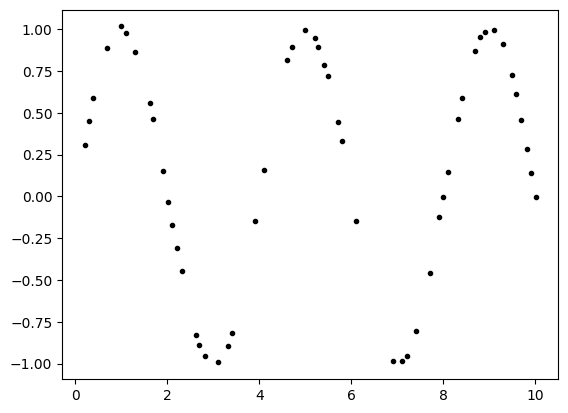

In [ ]:
data2=pd.read_csv('missing2.txt',sep=' ')
print(data2)
plt.plot(data2['time'],data2['values'],'k.')
plt.show()

#### Ex. 3. Missing data filled in with a 'bad data' value.

Sometimes, you'll find data files that use a large or negative number like -1 or -999 to mark bad data. Clearly, reading this data in the simple way won't work - pandas will happily interpret those values as real data. We need to tell it to mask those out. Pandas read_csv accepts an extra argument 'na_values' that we can use to tell it any values (single or list, numbers or strings) that should be interpreted as NaN.

          time      values  uncertainty
0     0.021454 -999.000000     0.837329
1     0.093116 -999.000000     0.779807
2     0.204718    0.309898     0.109524
3     0.306607    0.450582     0.457958
4     0.388601    0.590540     0.176450
..         ...         ...          ...
96    9.589282    0.612813     0.161543
97    9.697677    0.459697     0.260776
98    9.810221    0.283024     0.308425
99    9.902370    0.142896     0.169303
100  10.004203   -0.004508     0.047728

[101 rows x 3 columns]


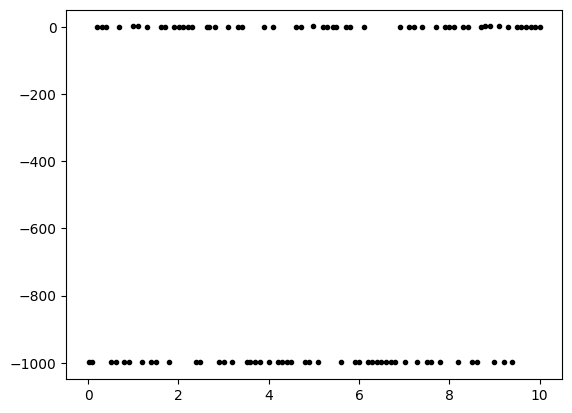

/tmp/ipython-input-23-3755933170.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data3['values'][badvalues] = np.nan


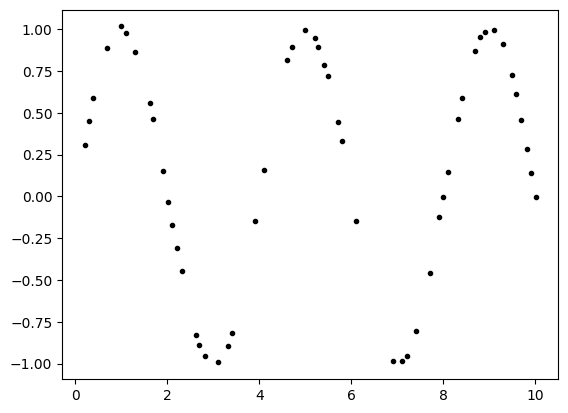

In [23]:
# whoops, this plot looks funny - all the "bad data (-999)" values are included and make the real data hard to see.
data3=pd.read_csv('missing3.csv')
print(data3)
plt.plot(data3['time'],data3['values'],'k.')
plt.show()

badvalues = data3['values'] < -10

data3['values'][badvalues] = np.nan

plt.plot(data3['time'],data3['values'],'k.')
plt.show()


          time    values  uncertainty
0     0.021454       NaN     0.837329
1     0.093116       NaN     0.779807
2     0.204718  0.309898     0.109524
3     0.306607  0.450582     0.457958
4     0.388601  0.590540     0.176450
..         ...       ...          ...
96    9.589282  0.612813     0.161543
97    9.697677  0.459697     0.260776
98    9.810221  0.283024     0.308425
99    9.902370  0.142896     0.169303
100  10.004203 -0.004508     0.047728

[101 rows x 3 columns]


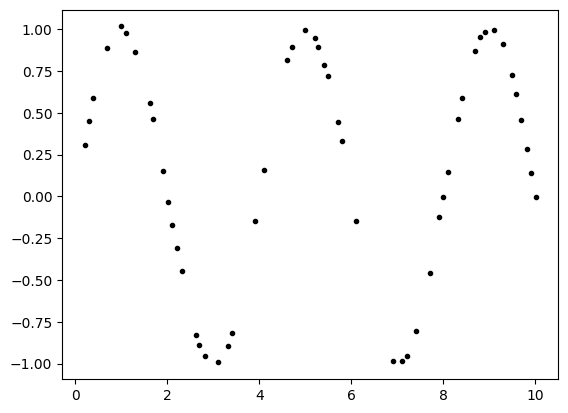

In [ ]:
# this is better. Adding the na_values argument masks out those data as NaN. Now we just have the real data.
data3=pd.read_csv('missing3.csv', na_values=-999)
print(data3)
plt.plot(data3['time'],data3['values'],'k.')
plt.show()

## 4. Logical Indexing - selecting data based on a condition

Often, we may want to select data from an array based on whether it meets some condition. For example, select all the data points that are less than 10. We could do that with a for loop:

In [10]:
# start with 6 random data points between 0 and 20:
data=1*np.random.randint(0,16,6)
print('original',data)

# create a blank array
new_data=np.array([])

# loop over all the data and decide whether to add it to the new array
for i in range(len(data)):
    if data[i] < 10:
        new_data = np.append(new_data,data[i])

print('new', new_data)

original [ 4 12  6 15  3  7]
new [4. 6. 3. 7.]


This works OK, but it's complicated. We had to start with a blank array, and manually fill it in. This is both confusing and difficult.

**The good news:**

Python allows us to do something much nicer: we can use "logical indexing", which means selecting elements from the array directly, using a logical statement.

In [11]:
# logical indexing for the same dataset:
print('original',data)

new_data = data[data<10]

print('new', new_data)

original [ 4 12  6 15  3  7]
new [4 6 3 7]


This works because Python is able to interpret our expression "data<10" as a comparison that should be applied to each element of the array. We can see this directly:

In [ ]:
print(data)
print(data<10)

[ 8  1 11  7  8  7]
[ True  True False  True  True  True]


What happens when we run data[data<10] is that python first evaluates the logical comparison for each element in the array, comes up with this boolean array that is the same size as 'data', and finally selects from the array 'data' only the elements where the value is 'True'. Pretty simple, right?

**The bad news:**

What happens if we want two conditions on our array? In python we combine logical conditions with the keywords 'and' and 'or'. For example:

In [12]:
print(data<10 and data>5)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

Huh. We have an error. Numpy does not know how to apply the logical operator "and" to arrays - we need to use the "&" operator instead. Note that we also need to include parentheses, because this operator has a higher order of operations precedence than the logical comparisons like < or >.

In [13]:
print(data)

print( (data<10) & (data>5) )

print( data[(data<10) & (data>5)] )

[ 4 12  6 15  3  7]
[False False  True False False  True]
[6 7]


Alternatively, we can use the special numpy function "np.logical_and" (or np.logical_or, etc.) to get this to work:

In [14]:
print(data)

print(np.logical_and(data<10, data>5))

print(data[np.logical_and(data<10, data>5)])

[ 4 12  6 15  3  7]
[False False  True False False  True]
[6 7]


#### Getting the index values instead of a logical array

Often when we do a logical operation on an array, we don't really want the long list of True/False values, we want to get the list of locations in the array where the result is true. We can get this with np.where:

In [18]:
print( np.where((data<10) & (data>5)) )

print(data[np.where((data<10) & (data>5))])

my_indices_to_keep = np.where((data<10) & (data>5))

print(data[my_indices_to_keep])

(array([2, 5]),)
[6 7]
[6 7]


In [ ]:
data1=np.array([1,2,3,4,5,6,7,8])
data2=np.array([4,5,2,7,0,7,4,0])

I3 = np.where(data2==0)
print(data1[I3])

This now gives us the list of locations in the logical array that were true. We can also use this in logical indexing - the result is the same:

In [ ]:
#define some variables to store the results
logicalArray = np.logical_and(data<10, data>5)
indexArray = np.where(logicalArray)

# these should be exactly the same:
print(data[logicalArray])
print(data[indexArray])

Note that the results of np.where() are in a "tuple" (the name for python elements enclosed in parentheses).

This doesn't affect the indexing, but can be a little annoying if we just want the list. Why does numpy do this?

The tuple concept makes more sense if we consider that a more commmon use of logical indexing is for 2D arrays. Consider:

In [32]:
# Create a 2D array
data_2d = np.array([[5, 10, 15],
                    [2,  8, 14],
                    [1,  9, 12]])

# Find where elements are less than 10 and greater than 1
print(np.where((data_2d < 10) & (data_2d > 3)))

# python can extract the two elements of a tuple as two output values:
rows, cols = np.where((data_2d < 10) & (data_2d > 3))

# Print the row and column indices
print("Row indices:", rows)
print("Column indices:", cols)


(array([0, 1, 2]), array([0, 1, 1]))
Row indices: [0 1 2]
Column indices: [0 1 1]


Now we can use these index lists to access all these values at once:

In [33]:
print('before\n',data_2d)
data_2d[rows, cols] = 0
print('after\n',data_2d)

before
 [[ 5 10 15]
 [ 2  8 14]
 [ 1  9 12]]
after
 [[ 0 10 15]
 [ 2  0 14]
 [ 1  0 12]]


### A warning about memory and copies

Python tries to be helpful when we are using NumPy arrays - it wants to save us memory. So if we do x=y, Python does not actually create a new array - it creates what is called a "view" into the array - this is just a list of the memory locations where the original data are stored.

This can be good, because if we're working with large arrays, this saves us a lot of memory usage.

However... you must always be careful when defining one array based on another, and then editing the second array.

For example:

In [ ]:
x=np.arange(5) # a simple numpy array
print('original x',x)
# y is just a 'view' of x:
y=x
print('original y',y)

y[0]=500 # only y was changed
print('new y',y)
print('new x',x) # whoa, somehow x changed too!

To avoid this, if we really want to copy an array, we must use the .copy() method of arrays. For example:

In [ ]:
x=np.arange(5) # a simple numpy array
print('original x',x)
# y is a true copy of x:
y=x.copy()
print('original y',y)

y[0]=500 # only y was changed
print('new y',y)
print('new x',x) # now x is safe!

#### Example. Dealing with outliers - obvious to humans but not pandas!

Outliers are data points that will mess up our analysis if they are included. We should always be extra careful when removing data, because values we consider "bad" might actually be telling us something very interesting!

However, sometimes the instrument is just broken, and we want to remove the data... this is OK, as long as we write down a clear criterion for removing the data and are honest about it.

Here is a simple data file (no missing values), but some of the data are really (*really*) bad. We can tell they are bad because the third column (uncertainty) is about 100x larger than it should be. We can remove these data in a handy way using logical indexing.

In [ ]:
# lots of outliers in this dataset, with large values...
data4=pd.read_csv('bad_data.csv')
print(data4)
plt.plot(data4['time'],data4['values'],'k.')
plt.show()

From the plot, we can see that while the good data should be between [-1, 1], the bad data is very large - to be safe, we can be sure it's >10. So let's set that as our criterion:

In [ ]:
# first, we make a copy of the dataset. This is necessary because python will try to save memory, and if we just say
# data4_masked = data4, it will make a view of the data (just another pointer to the same data in memory).
data4_masked = data4.copy()

# now, make a 'boolean array' that tells us whether the data are greater than 10.
bad_vals = data4_masked['values']>10

# now, set those bad values to be np.nan.
data4_masked['values'][bad_vals]=np.nan

print(data4_masked)
plt.plot(data4_masked['time'],data4_masked['values'],'k.')
plt.show()

### Another way - Pandas queries

Pandas allows us to operate on datasets in a way similar to np.logical_and() with the .query() operator. This is applied directly to our dataset; here is a brief example that removes the bad rows of data entirely from the dataset above:

In [ ]:
d = pd.read_csv('bad_data.csv')
print(d)

# note, this actually removes every row with bad data, rather than setting them to NaN.
sub_d = d.query("(values < 10) and (uncertainty < 10)").copy()
print(sub_d)

plt.plot(sub_d['time'],sub_d['values'],'k.')
plt.show()